## LendingClub - CaseStudy

Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.

Objective is, using EDA understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment

### Steps followed:
* Data Cleaning
* Univariate Analysis
* Segemented Univariate Analysis
* Bivaraiate/Multivariate Analysis
* Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


Dropping columns with all Null/NA values

In [4]:
df_noNA = df.dropna(axis=1, how="all", inplace=False)

After analysing the columns and values in Excel, we have columns with following type of values 
* Columns either has same or 1-2 values only.
* Columns having all Null/NA values

Removing these columns will not affect the observation.

In [5]:
drop_columns = ["policy_code", 
                "collections_12_mths_ex_med",
                "acc_now_delinq",
                "delinq_amnt",
                "tax_liens",
                "next_pymnt_d",
                "pymnt_plan",
                "application_type",
                "mths_since_last_delinq",
                "mths_since_last_record"
               ]
df_noNA.drop(labels = drop_columns, axis =1, inplace=True)

Some of the columns have values which will not be affecting the obervation, some of those types of columns are folllowing:
* Columns with only long text values
* Columns with ID, title etc

In [6]:
drop_columns_2 = ["url", "initial_list_status", "zip_code", "member_id", "desc","emp_title", "addr_state","id", "title"]
df_noNA.drop(labels = drop_columns_2, axis =1, inplace=True)

As per investment google search, some of the columns are just taken for records, post loan is approved.
In such cases, these columns will not be affecting the default outcome.

In [7]:
drop_columns_3 = ["delinq_2yrs", 
                  "total_rec_prncp", 
                  "total_rec_late_fee", 
                  "total_rec_int", 
                  "recoveries", 
                  "last_credit_pull_d", 
                  "last_pymnt_d", 
                  "chargeoff_within_12_mths"]
df_noNA.drop(labels = drop_columns_3, axis =1, inplace=True)

Some of the variables related to Customer Behaviour will not be available at time of loan application and can be removed.
### List of Customer Behavior Variables
* delinq_2yrs
* earliest_cr_line
* inq_last_6mths
* open_acc
* revol_bal
* revol_util
* total_acc
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d
* application_type

Some of the columns we have already removed as part of previous analysis.

In [8]:
drop_columns_4 = ["earliest_cr_line",
                  "inq_last_6mths",
                  "open_acc",
                  "revol_bal",
                  "revol_util",
                  "total_acc",
                  "out_prncp",
                  "out_prncp_inv",
                  "total_pymnt",
                  "total_pymnt_inv",
                  "collection_recovery_fee",
                  "last_pymnt_amnt"]
df_noNA.drop(labels = drop_columns_4, axis =1, inplace=True)

In [9]:
# Updated Dataframe
df_noNA.shape

(39717, 18)

Now, as next step in EDA, we will be analysing data in following sequence:
* Check for null/NA values
* Check for outliner

Following few lines of code block will handle null values present in the data.

In [10]:
df_noNA.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
pub_rec                   int64
pub_rec_bankruptcies    float64
dtype: object

In [11]:
100 * df_noNA.isna().sum()/len(df.index)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

Following columns have null/na values
* emp_length
* revol_util
* pub_rec_bankruptcies

In [12]:
df_noNA['emp_length'].isna().sum()

1075

In [13]:
# For catagorical columns, its suggested to use Mode to fill null values.
emp_length_mode = df_noNA['emp_length'].mode()[0]
df_noNA['emp_length'].fillna(emp_length_mode, inplace=True)

In [14]:
df_noNA['emp_length'].isna().sum()

0

In [15]:
df_noNA['pub_rec_bankruptcies'].isna().sum()

697

In [16]:
df_noNA['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [17]:
df_noNA['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [18]:
# Zero (0) is the most common value, so filling null/na values with zero (0)
pub_rec_bankruptcies_mode = df_noNA['pub_rec_bankruptcies'].mode()[0]
df_noNA['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_mode, inplace=True)

In [19]:
df_noNA['pub_rec_bankruptcies'].isna().sum()

0

In [20]:
100 * df_noNA.isna().sum()/len(df.index)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
dtype: float64

At this stage, we are in following state:
* Columns which will not affect the observation are cleaned
* Data corresponding to null/na data are cleaned

# Uni-variant Analysis

Further Data processing is required, for which following steps will be taken
* Re-structure data in proper format
* Add new columns, which could help in analysis

In [21]:
# Convert emp_length to int, as per given in data_dict.
# lamdba could also be used, but for readability method is used.
def get_emp_length(x):
    '''
    Util method to return numeric for emp_length column
    input: data from emp_length
    output: corresponding integer
    return: None
    '''
    if '<' in x:
        return int(x.split()[1])
    elif '+' in x:
        return int(x.split()[0][:-1])
    else:
        return int(x.split()[0])

In [22]:
def save_dataframe_to_csv(df_obj, file_name=None):
    '''
    Util method to save a Dataframe to CSV file
    input: dataframe
    output: CSV file
    return: None
    '''
    df = df_obj.reindex(sorted(df_obj.columns), axis=1)
    new_file_name = 'loan_New.csv'
    if file_name != None:
        new_file_name = "{0}-{1}.csv".format(file_name[:file_name.index(".")], "New")

    df.to_csv('loan_New.csv', sep=',', index=False)

In [23]:
df_noNA['int_rate'] = df_noNA['int_rate'].apply(lambda x: x[:-1])

In [24]:
df_noNA['int_rate'] = df_noNA['int_rate'].apply(pd.to_numeric)

In [25]:
df_noNA['term'] = df_noNA['term'].apply(lambda x: int(x.split()[0]))

In [26]:
df_noNA['emp_length'] = df_noNA['emp_length'].apply(get_emp_length)

In [27]:
df_noNA['issue_d'] = pd.to_datetime(df_noNA['issue_d'], format="%b-%y")

In [28]:
df_noNA['issue_month'] = df_noNA['issue_d'].dt.month

In [29]:
df_noNA['issue_year'] = df_noNA['issue_d'].dt.year

Following few lines of code block will handle Outliners values present in the data.

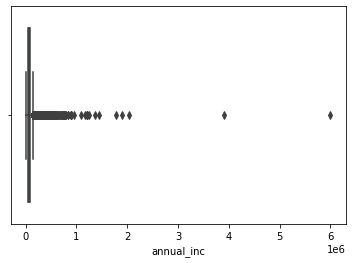

In [30]:
sbn.boxplot(df_noNA['annual_inc'])
plt.show()

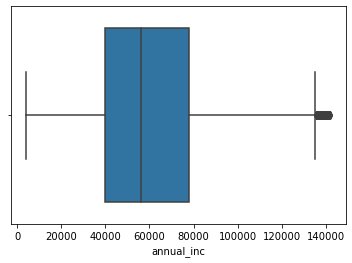

In [31]:
sbn.boxplot(df_noNA[df_noNA['annual_inc'] < df_noNA['annual_inc'].quantile(0.95)]['annual_inc'])
plt.show()

*Observation*: With 0.90 percentile, box plot is looking good after all outline removal.
need to make sure, date set to have value less than 0.98 percentile.

In [32]:
df_noNA = df_noNA[df_noNA['annual_inc'] < df_noNA['annual_inc'].quantile(0.95)]

In [33]:
df_noNA['annual_inc'].describe()

count     37730.000000
mean      61043.976506
std       27795.211362
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [34]:
df_noNA['int_rate'].describe()

count    37730.000000
mean        11.971601
std          3.697439
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [35]:
df_noNA['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [36]:
df_noNA['loan_amnt'].describe()

count    37730.000000
mean     10845.205407
std       7153.931580
min        500.000000
25%       5075.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

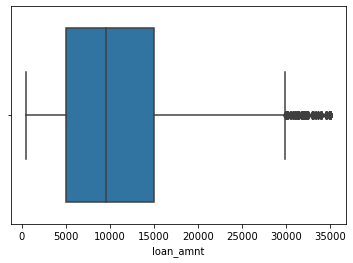

In [37]:
sbn.boxplot(df_noNA['loan_amnt'])
plt.show()

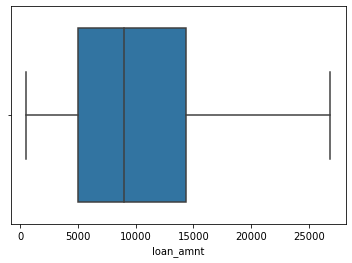

In [38]:
sbn.boxplot(df_noNA[df_noNA['loan_amnt'] < df_noNA['loan_amnt'].quantile(0.97)]['loan_amnt'])
plt.show()

In [39]:
# Observation: With 0.97 percentile, box plot is looking good after all outline removal.
# need to make sure, date set to have value less than 0.97 percentile.
df_noNA = df_noNA[df_noNA['loan_amnt'] < df_noNA['loan_amnt'].quantile(0.97)]

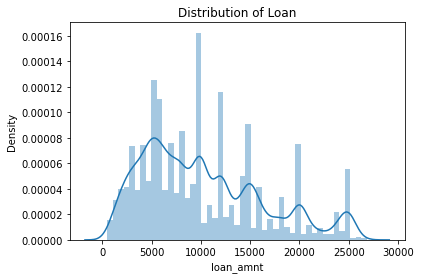

In [40]:
sbn.distplot(df_noNA['loan_amnt'], vertical=False)
plt.title("Distribution of Loan")
plt.show()

### Observation
Higher density of loan is observed between 0-10k

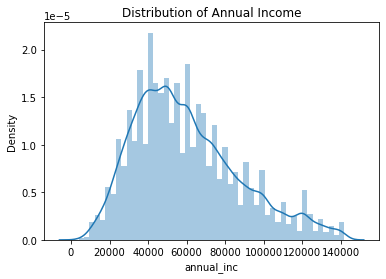

In [41]:
sbn.distplot(df_noNA['annual_inc'], vertical=False)
plt.title("Distribution of Annual Income")
plt.show()

### Observation:
High density is observed in 20-60k range, most individuals have salary in 20-60k range.

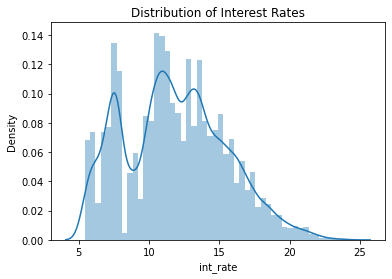

In [43]:
sbn.distplot(df_noNA['int_rate'], vertical=False)
plt.title("Distribution of Interest Rates")
plt.show()

### Observation:
Most of the Interest rates are between 10-15%

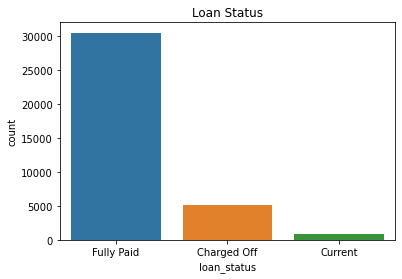

In [45]:
sbn.countplot(x="loan_status",data=df_noNA)
plt.title("Loan Status")
plt.show()

In [46]:
df_noNA['loan_status'].value_counts()

Fully Paid     30484
Charged Off     5177
Current          927
Name: loan_status, dtype: int64

### Observation:
* Most of the loans are "Fully Paid"
* Around 14% of the loans are "charged-off"

# Bi-variant Analysis

For Bi-variant analysis, we need to create few bin columns from existing numeric data

In [41]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000]
bin_labels=['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120k+']
df_noNA['annual_inc_bin'] = pd.cut(df_noNA['annual_inc'], bins, labels=bin_labels)

In [42]:
bins = [0, 5, 10, 15, 20, 25]
bin_labels=['0-5', '5-10', '10-15', '15-20', '20+']
df_noNA['dti_bin'] = pd.cut(df_noNA['dti'], bins, labels=bin_labels)

In [43]:
bins = [0, 5, 10, 15, 20, 25]
bin_labels=['Very Low', 'Low', 'Mid', 'High', 'Very-High']
df_noNA['int_rate_bin'] = pd.cut(df_noNA['int_rate'], bins, labels=bin_labels)

### Compare loan purpose with Charged-off percentage

In [44]:
df_year_purpose = df_noNA.groupby(['issue_year','purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_year_purpose['total_loan'] = df_year_purpose['Charged Off'] + df_year_purpose['Current'] + df_year_purpose['Fully Paid']
df_year_purpose['charged_off_perc'] = 100 * df_year_purpose['Charged Off']/df_year_purpose['total_loan']

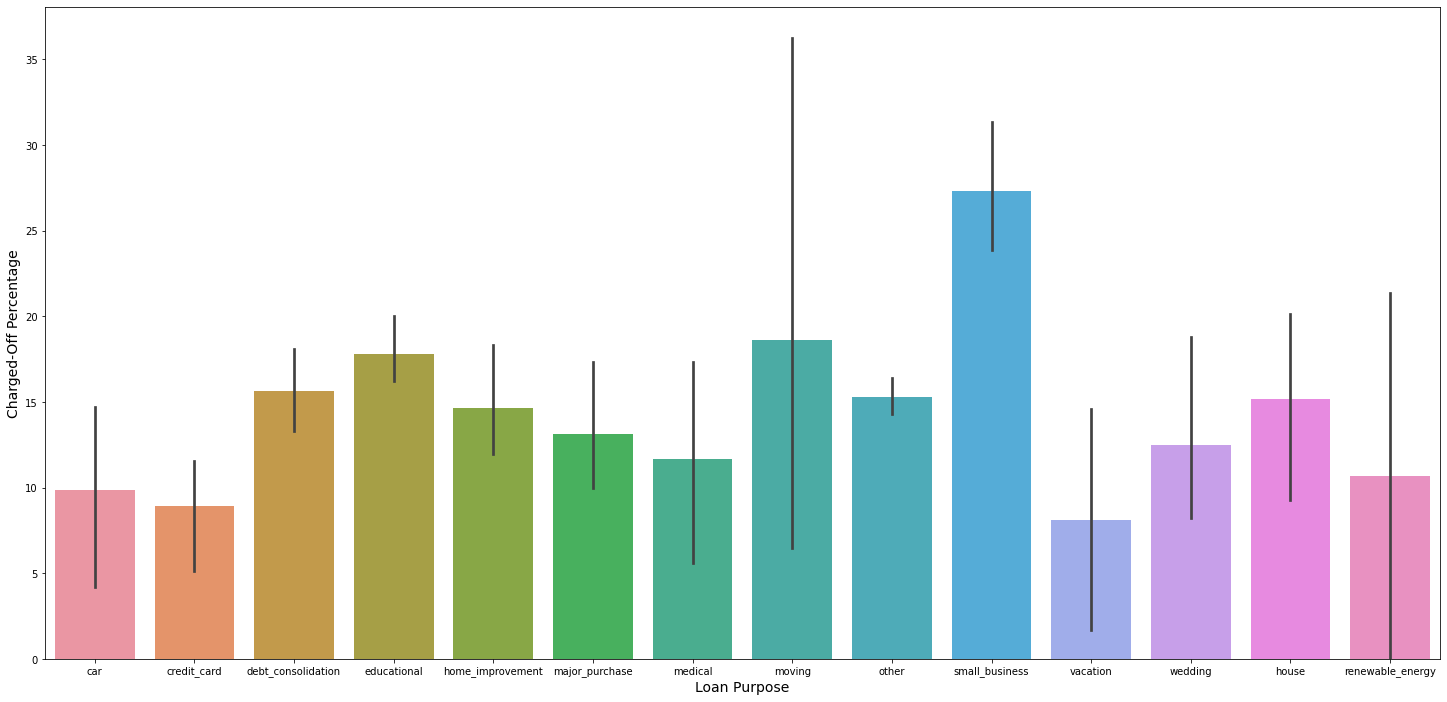

In [45]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_year_purpose, x='purpose', y='charged_off_perc')
plt.xlabel('Loan Purpose',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

## Observation: 
Loans taken for "small business" are the one for which "charge off" percentage is highest

### Compare Applicant Annual income with Charged-off percentage

In [46]:
df_annual_inc_loan = df_noNA.groupby(['annual_inc_bin', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_annual_inc_loan['total_loan'] = df_annual_inc_loan['Charged Off'] + df_annual_inc_loan['Current'] + df_annual_inc_loan['Fully Paid']
df_annual_inc_loan['charged_off_perc'] = 100 * df_annual_inc_loan['Charged Off']/df_annual_inc_loan['total_loan']

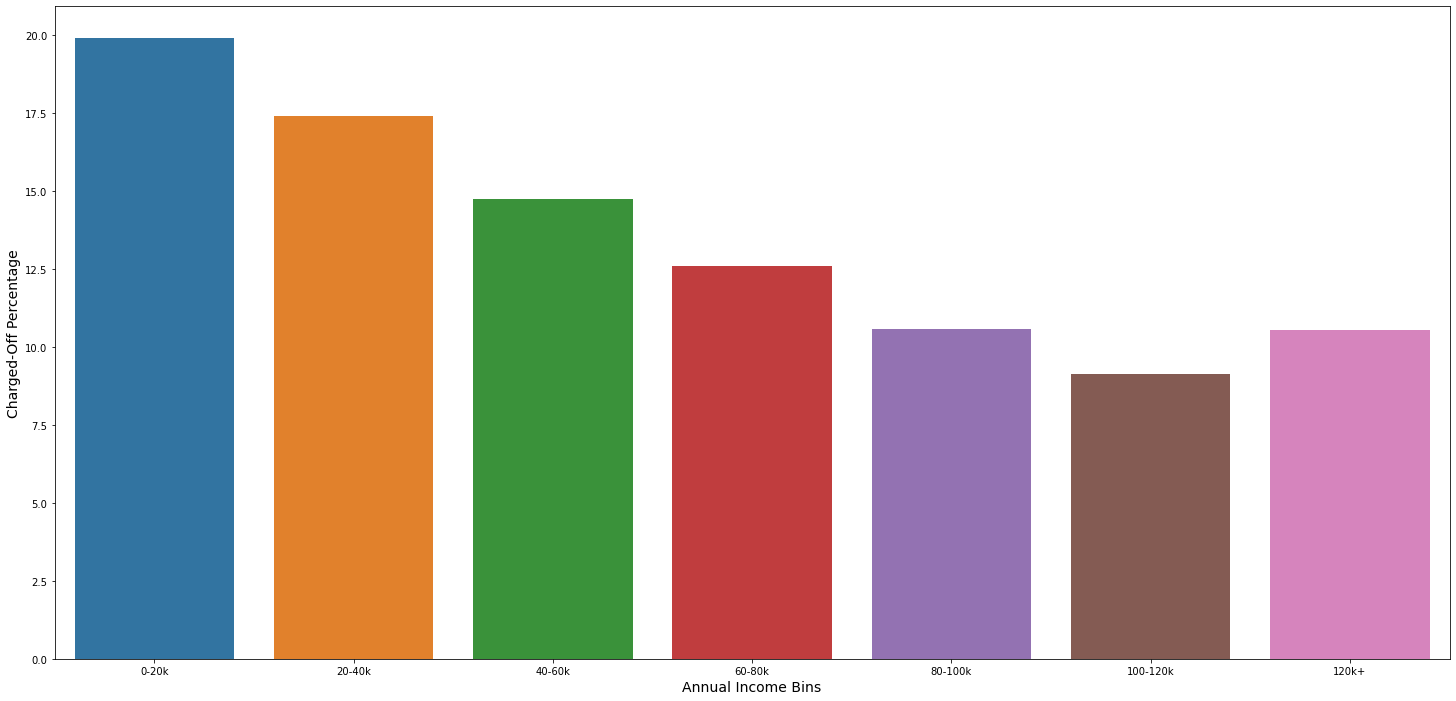

In [47]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_annual_inc_loan, x='annual_inc_bin', y='charged_off_perc')
plt.xlabel('Annual Income Bins',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

## Observation: 
Less salary individuals (0-20k) are the one for which "Charged Off" percentage is highest.

### Compare Grade with Charged-off percentage

In [48]:
df_grade_loan = df_noNA.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_grade_loan['total_loan'] = df_grade_loan['Charged Off'] + df_grade_loan['Current'] + df_grade_loan['Fully Paid']
df_grade_loan['charged_off_perc'] = 100 * df_grade_loan['Charged Off']/df_grade_loan['total_loan']

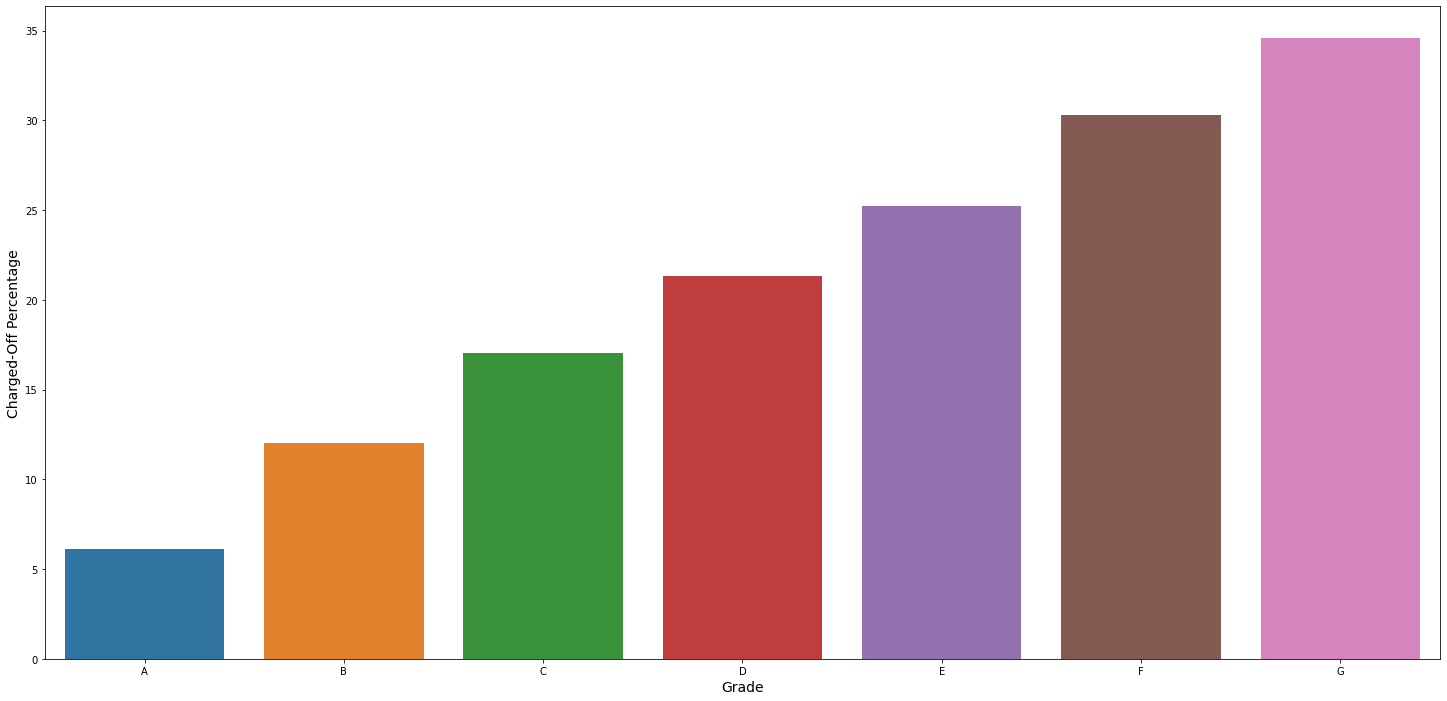

In [49]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_grade_loan, x='grade', y='charged_off_perc')
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

### Observation: 
Individual with lesser grade tend to have higher "Charged Off" percentage.

### Compare Employee Length with Charged-off percentage

In [50]:
df_emp_loan = df_noNA.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_emp_loan['total_loan'] = df_emp_loan['Charged Off'] + df_emp_loan['Current'] + df_emp_loan['Fully Paid']
df_emp_loan['charged_off_perc'] = 100 * df_emp_loan['Charged Off']/df_emp_loan['total_loan']

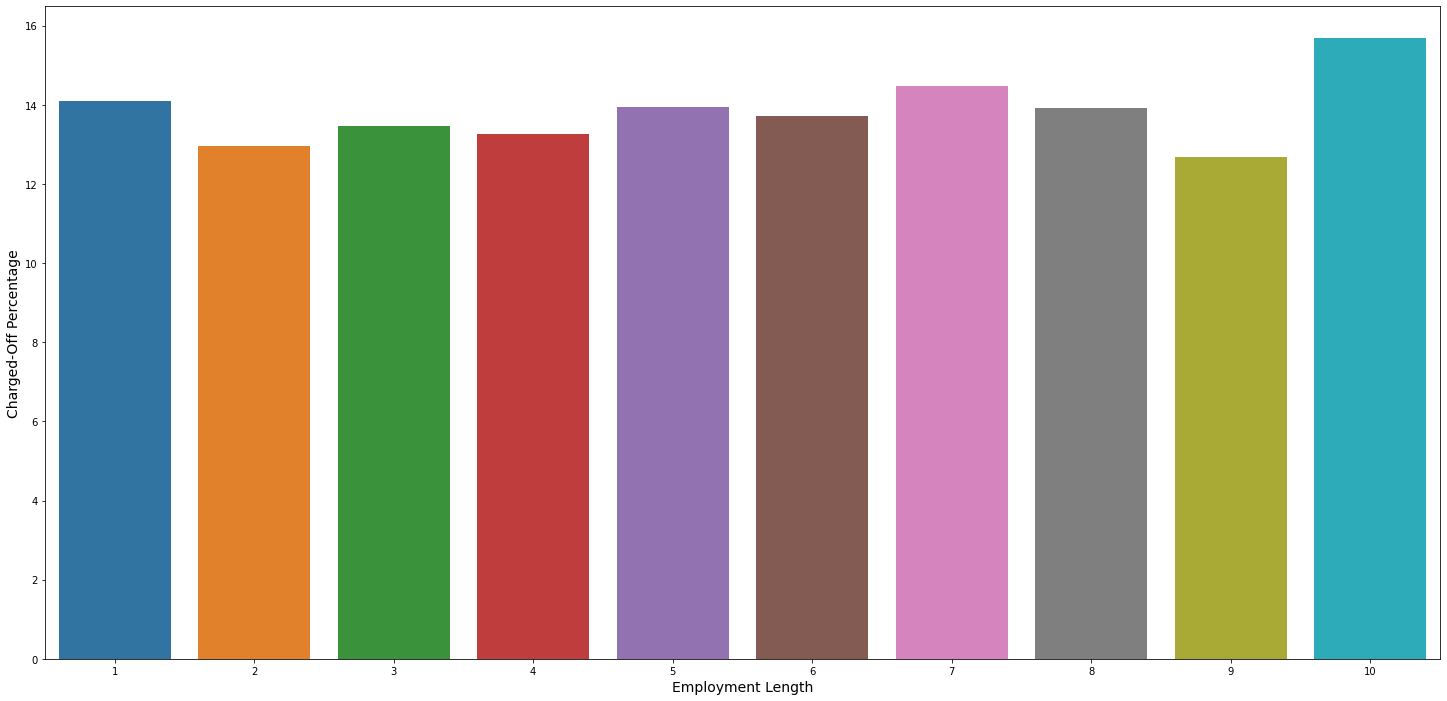

In [51]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_emp_loan, x='emp_length', y='charged_off_perc')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

### Observation: 
Employee length is not affecting "Charged Off" percentage, mostly it's aroun 12-14. With exception for 10,10+ year where
charge-off percentage is higher

In [52]:
df_bankruptcies_loan = df_noNA.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_bankruptcies_loan['total_loan'] = df_bankruptcies_loan['Charged Off'] + df_bankruptcies_loan['Current'] + df_bankruptcies_loan['Fully Paid']
df_bankruptcies_loan['charged_off_perc'] = 100 * df_bankruptcies_loan['Charged Off']/df_bankruptcies_loan['total_loan']

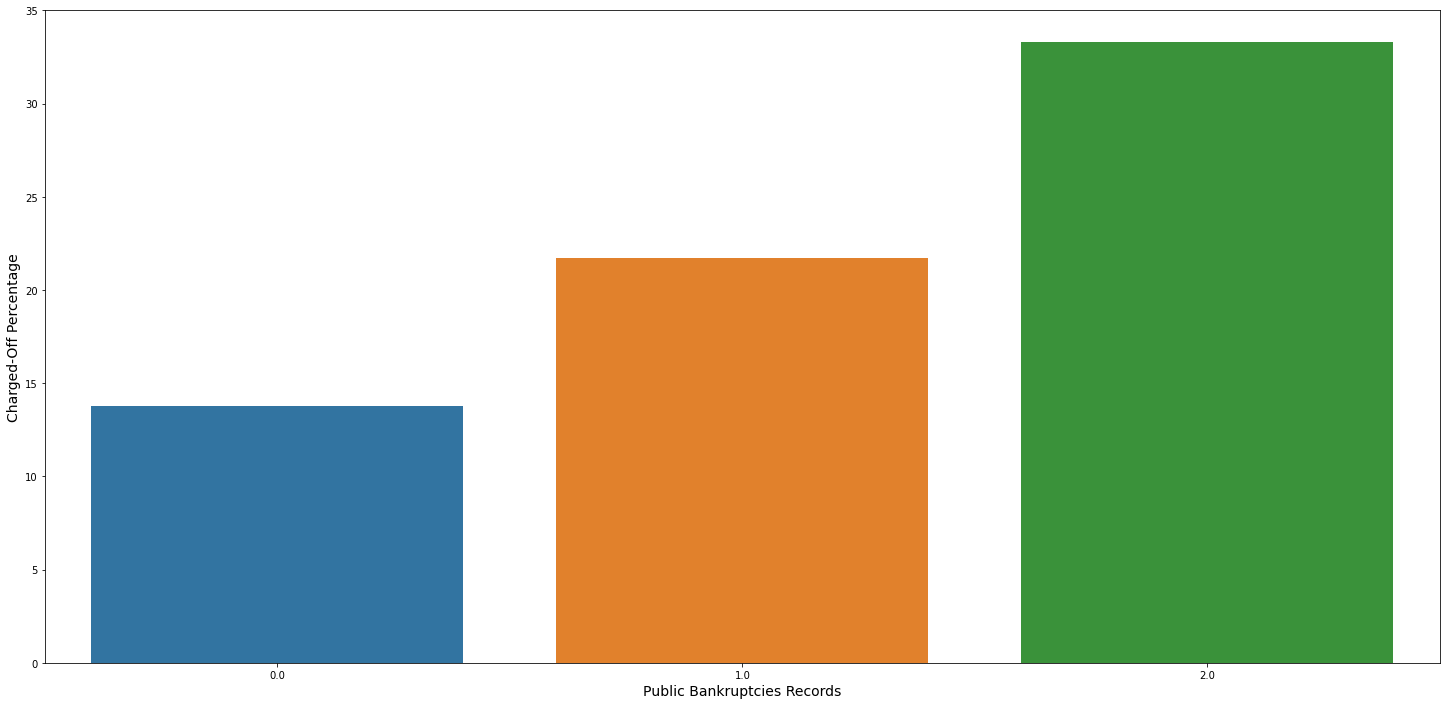

In [53]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_bankruptcies_loan, x='pub_rec_bankruptcies', y='charged_off_perc')
plt.xlabel('Public Bankruptcies Records',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

### Observation: 
Individual with higher bankrupticies public records are having high charge-off percentage.

In [54]:
df_pub_rec_loan = df_noNA.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_pub_rec_loan['total_loan'] = df_emp_loan['Charged Off'] + df_pub_rec_loan['Current'] + df_pub_rec_loan['Fully Paid']
df_pub_rec_loan['charged_off_perc'] = 100 * df_pub_rec_loan['Charged Off']/df_pub_rec_loan['total_loan']

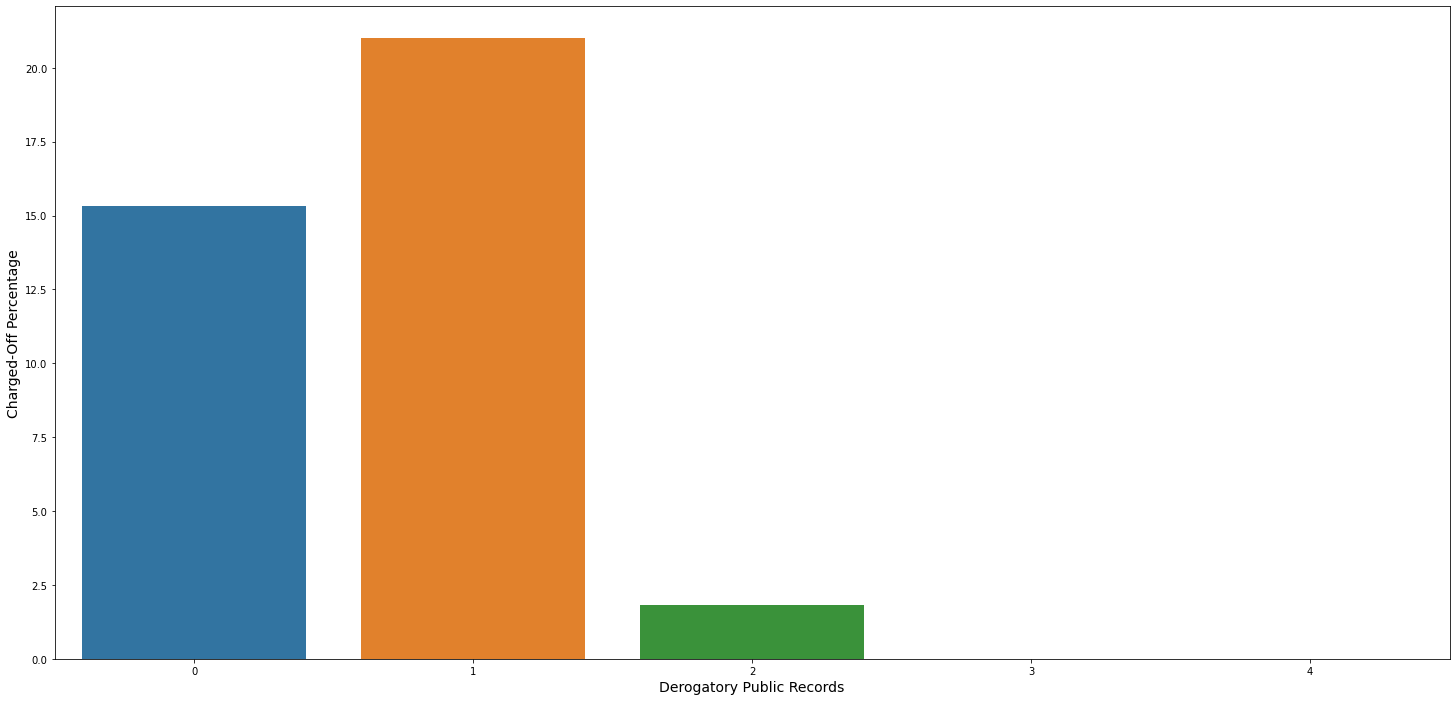

In [55]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_pub_rec_loan, x='pub_rec', y='charged_off_perc')
plt.xlabel('Derogatory Public Records',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

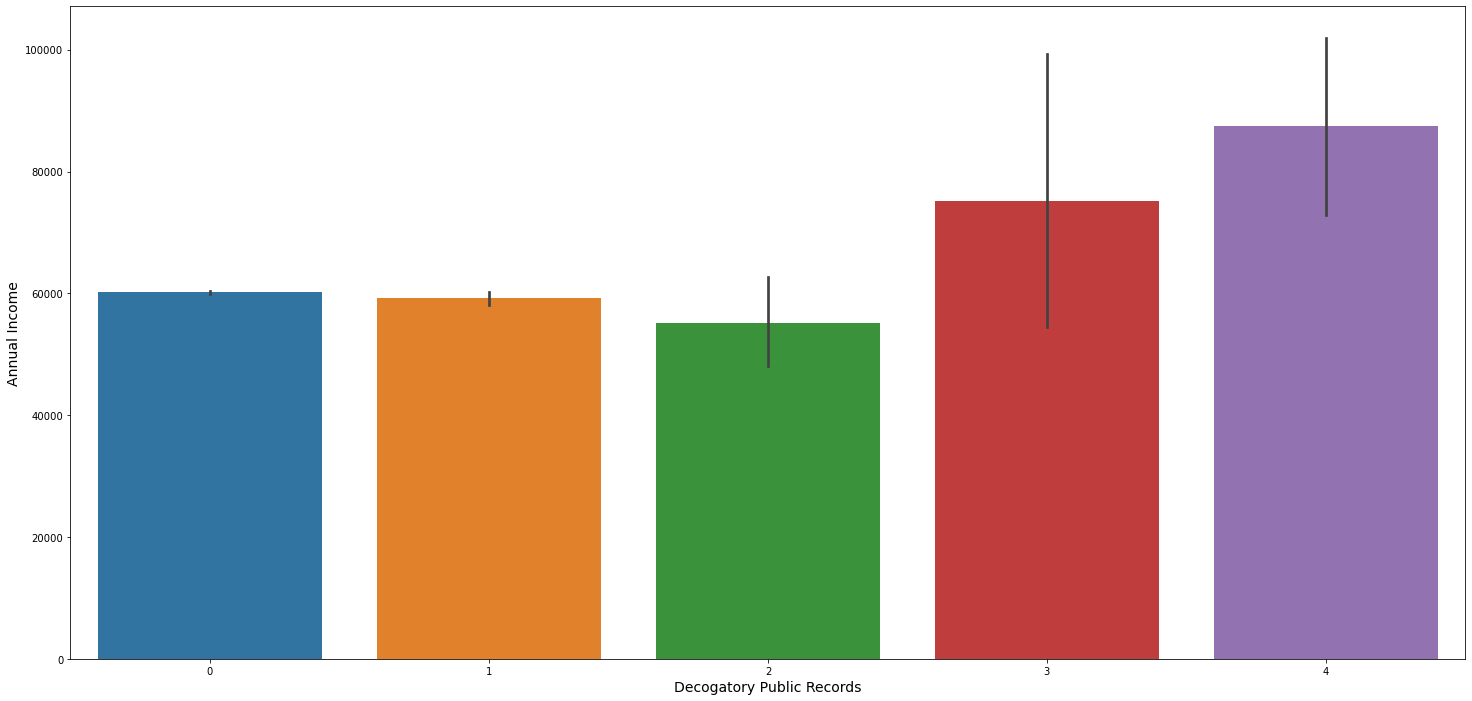

In [56]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_noNA, x='pub_rec', y='annual_inc')
plt.xlabel('Decogatory Public Records',fontsize=14)
plt.ylabel('Annual Income',fontsize=14)
plt.show()

### Observation: 
With increase in public derogatory records, annual income is also increasing, which could be the reason that with increase in pub_rec (public derogatory records) charged-off percentage decreased.

In [57]:
df_verification_loan = df_noNA.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
df_verification_loan['total_loan'] = df_verification_loan['Charged Off'] + df_verification_loan['Current'] + df_verification_loan['Fully Paid']
df_verification_loan['charged_off_perc'] = 100 * df_verification_loan['Charged Off']/df_verification_loan['total_loan']

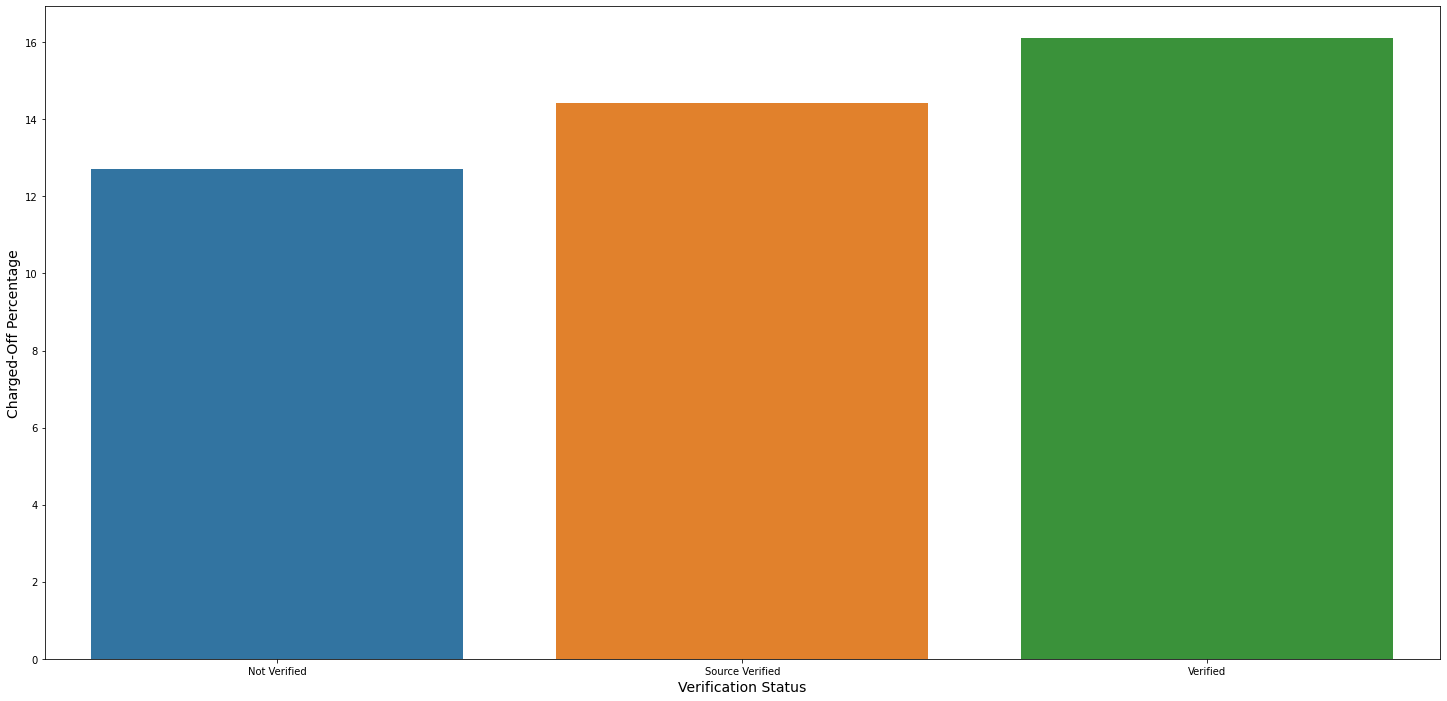

In [58]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_verification_loan, x='verification_status', y='charged_off_perc')
plt.xlabel('Verification Status',fontsize=14)
plt.ylabel('Charged-Off Percentage',fontsize=14)
plt.show()

### Observation:
Individuals for which income is verified are more likely to be "charged-off".

In [59]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
bin_labels=['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25-30k', '+30k']
df_noNA['loan_amnt_bin'] = pd.cut(df_noNA['loan_amnt'], bins, labels=bin_labels)

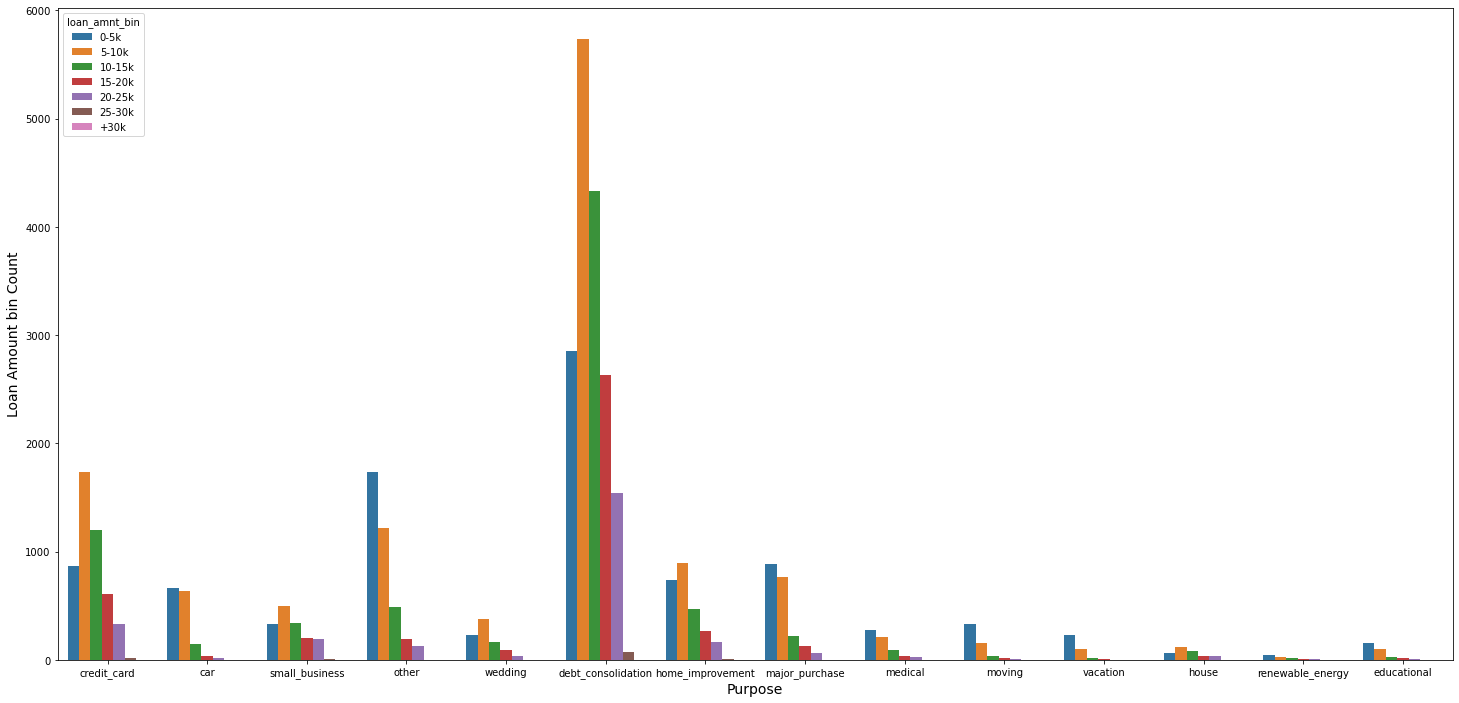

In [60]:
plt.figure(figsize=(25,12))
sbn.countplot(data=df_noNA, x='purpose', hue='loan_amnt_bin')
plt.xlabel('Purpose',fontsize=14)
plt.ylabel('Loan Amount bin Count',fontsize=14)
plt.show()

### Observation:
* Strongest reason to take loan is for "Debt Consolidation", which is common across all range of Annual income
* Normally, individual with salary range between 5-10k are the one taking most of the loan.

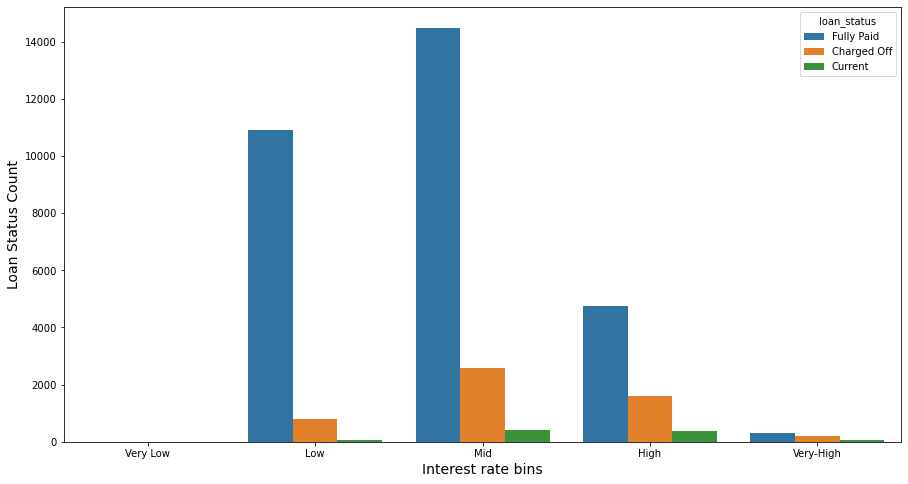

In [61]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='int_rate_bin', hue='loan_status')
plt.xlabel('Interest rate bins',fontsize=14)
plt.ylabel('Loan Status Count',fontsize=14)
plt.show()

### Observation:
* As Loan interest increases, number of loans reduce significantly
* As loan interest increases, number of "Charged-off" increases.
* As loan interest increases, number of "Fully Paid" increases, maybe individual is trying to pay to loan fully then paying higher interest.

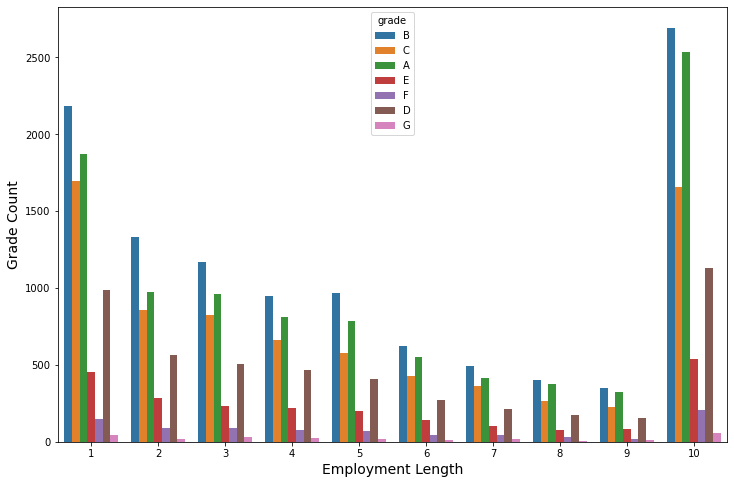

In [62]:
plt.figure(figsize=(12,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='grade')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Grade Count',fontsize=14)
plt.show()

### Observation:
As Employee service length increases, Grade allocated to Individual increases.
It makes sense, as number of years for individual increases, salary of individual increases and his paying capacity will also increase.

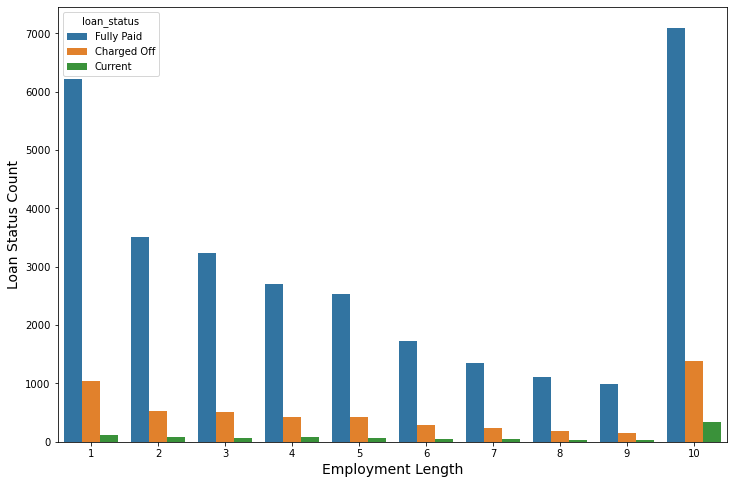

In [63]:
plt.figure(figsize=(12,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='loan_status')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Loan Status Count',fontsize=14)
plt.show()

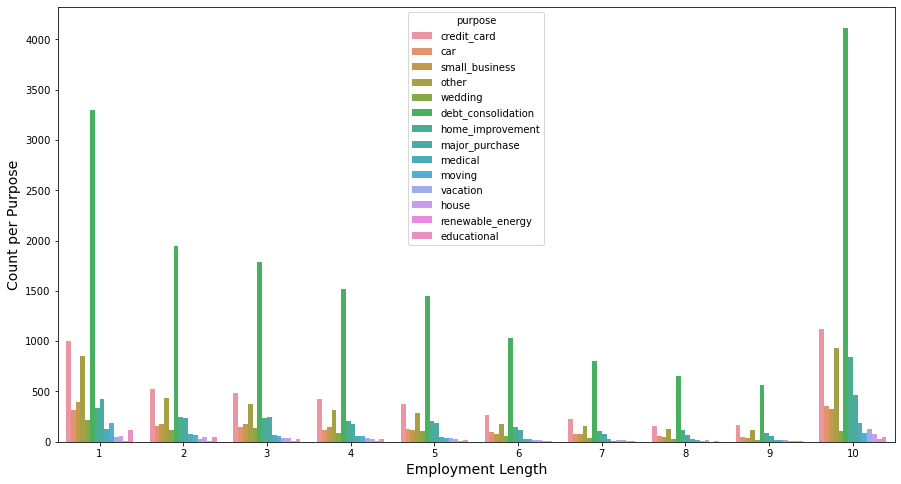

In [64]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='purpose')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Count per Purpose',fontsize=14)
plt.show()

### Oservation:
* Across all individuals of employment service, loan is taken for Dept-consolidation

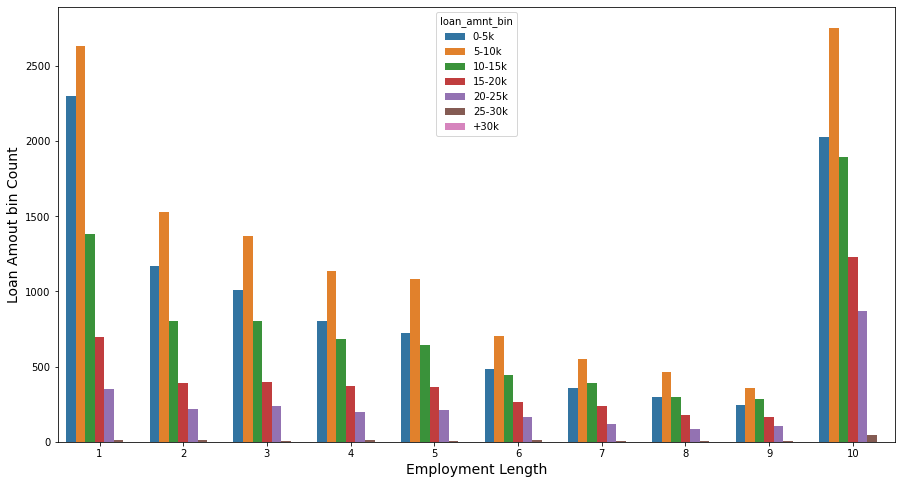

In [65]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='emp_length', hue='loan_amnt_bin')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Loan Amout bin Count',fontsize=14)
plt.show()

### Observation:
* Across all obervation, mostly loan is taken for small quantity 5-10k, which makes sense as from earlier figures, mostly loan is taken for dept-consolidation

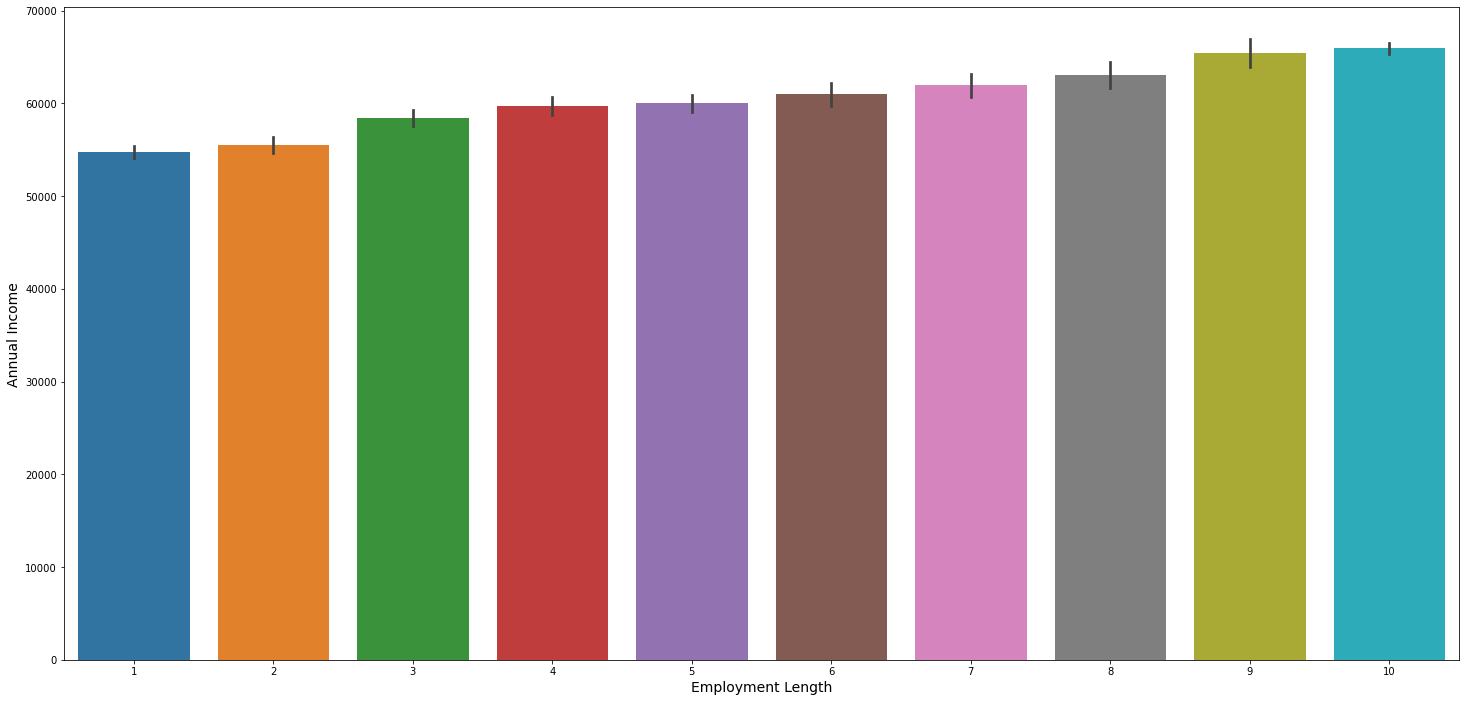

In [66]:
plt.figure(figsize=(25,12))
sbn.barplot(data=df_noNA, x='emp_length', y='annual_inc')
plt.xlabel('Employment Length',fontsize=14)
plt.ylabel('Annual Income',fontsize=14)
plt.show()

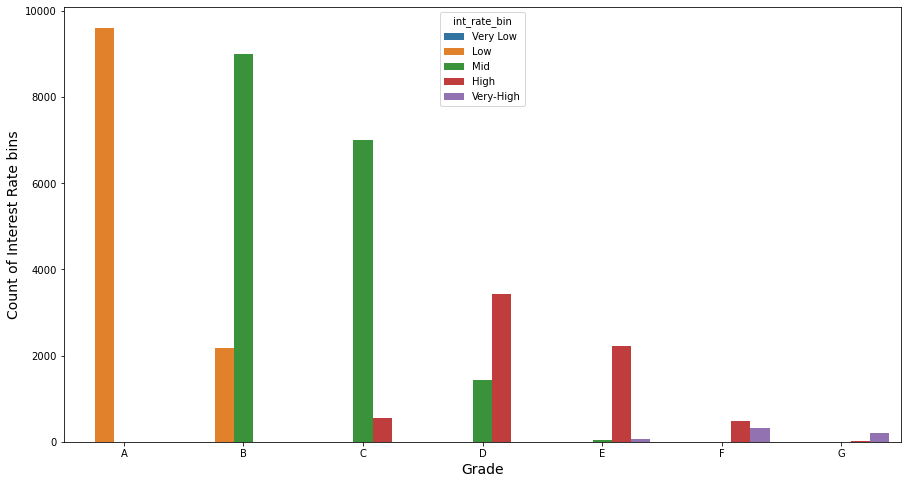

In [67]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='grade', hue='int_rate_bin', order=['A','B','C','D','E','F','G'])
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Count of Interest Rate bins',fontsize=14)
plt.show()

### Observation:
* Interest rate increase with decrease in Grades

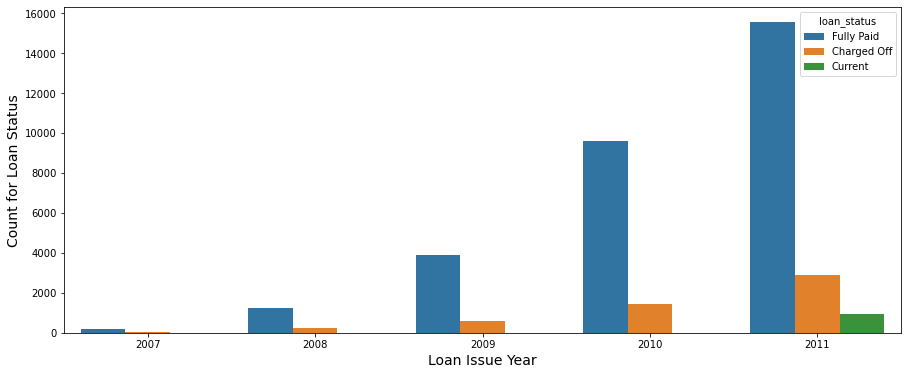

In [68]:
plt.figure(figsize=(15,6))
df_noNA.groupby(['issue_year','issue_month']).loan_status.count().unstack().fillna(0).reset_index()
sbn.countplot(data=df_noNA, x='issue_year', hue='loan_status')
plt.xlabel('Loan Issue Year',fontsize=14)
plt.ylabel('Count for Loan Status',fontsize=14)
plt.show()

### Observation:
* No of loans are increasing each year, which seems to be the reason for increase in Charged-off applications.

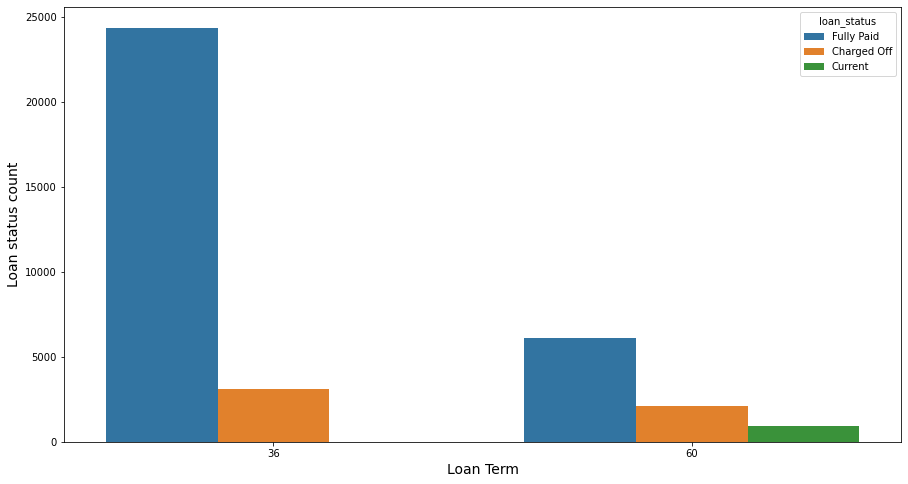

In [69]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='term', hue='loan_status')
plt.xlabel('Loan Term',fontsize=14)
plt.ylabel('Loan status count',fontsize=14)
plt.show()

### Observation:
* Term month does not have much impact on "charge-off", they do have impact on "Fully Paid". Lower the term, more number of "Fully Paid" individuals.

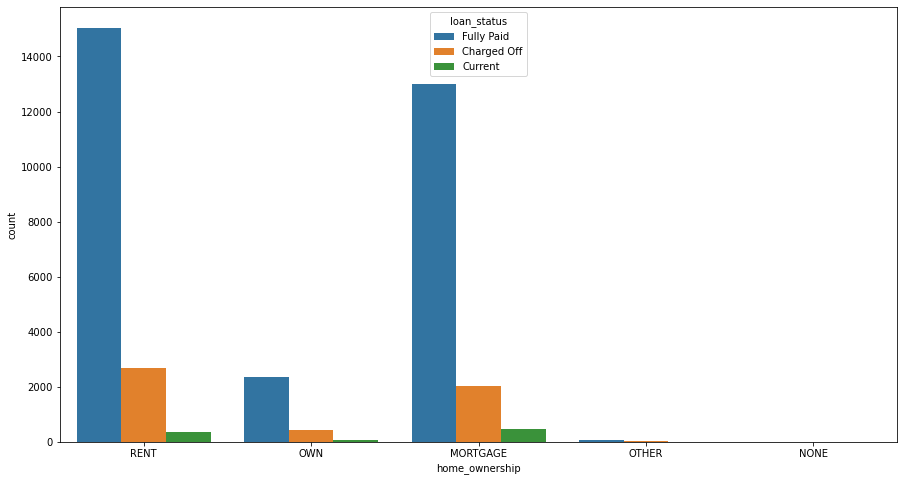

In [79]:
plt.figure(figsize=(15,8))
sbn.countplot(data=df_noNA, x='home_ownership', hue='loan_status', orient='v')
plt.show()

### Observation:
Individuals living in Rented or Mortgages house, take loan most and do have more defaulter compared to individual owning house.

<Figure size 2880x1800 with 0 Axes>

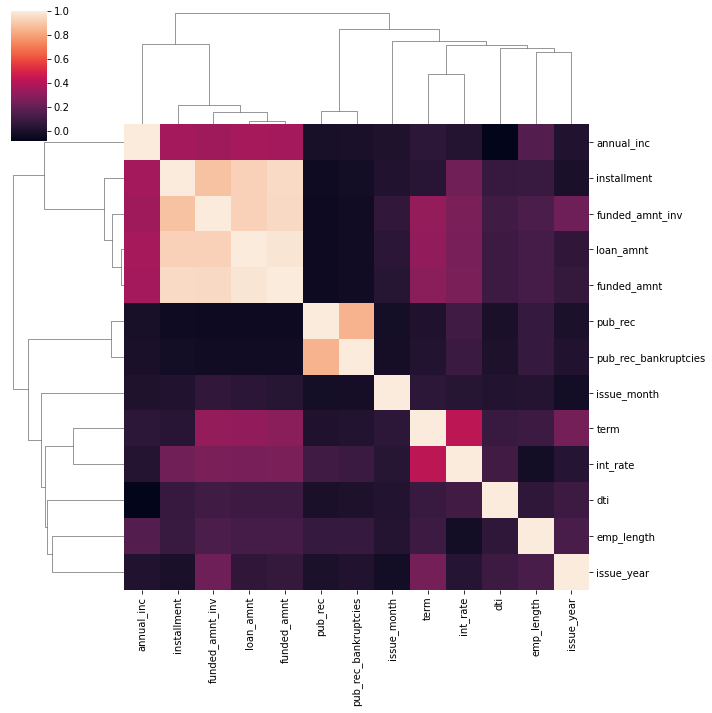

In [70]:
plt.figure(figsize=(40,25))
corr_obj = df_noNA.corr()
sbn.clustermap(corr_obj, annot=False)
plt.show()

Observation: 
Annotation is set to false, as with annotation, analysis is hard, first we will analyse using the Color index to find out co-relation, some of the highly co-related columns are following:
* funded_amnt, instalment, funded_amnt_inv, loan_amnt
* pub_rec and pub_rec_bankruptcies 

Re-draw co-relation metrics to re-confirm the analysis

<Figure size 1296x864 with 0 Axes>

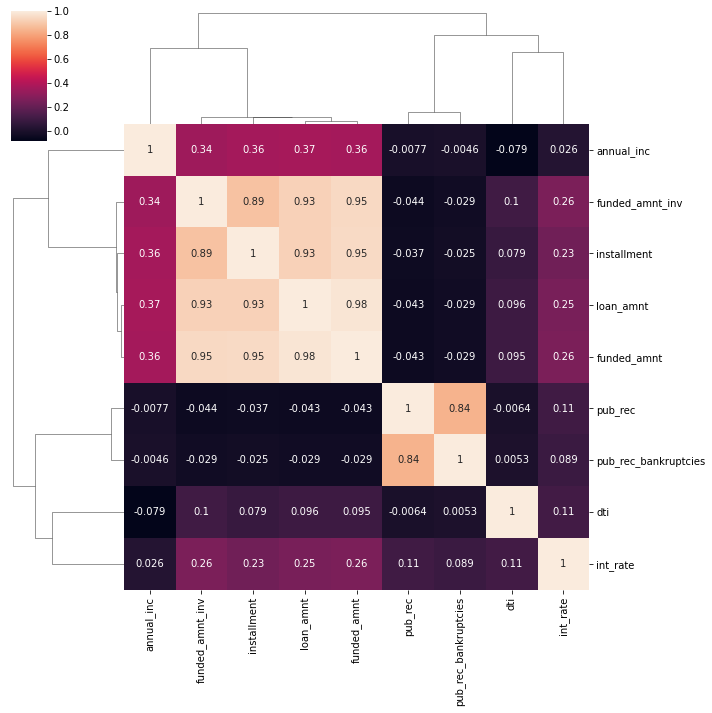

In [71]:
plt.figure(figsize=(18,12))
corr_obj = df_noNA[['loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'installment', 
                    'annual_inc', 
                    'dti', 
                    'pub_rec',
                    'pub_rec_bankruptcies', 
                    'int_rate']].corr()
sbn.clustermap(corr_obj, annot=True)
plt.show()

### Recommendation:
* Loan taken with following characteristics are most likely to get Charged-off: 
    *	Loan is taken "Dept-consolidation" or "small-business"
    *	Loan amount is less: 5-10k.
    *	When loan is taken at higher interest rates.
    *	Loan is taken by Low salary individuals (0-20k)
* As salary of individual increase, his paying capacity increases and thus charge-off decrease.
